Abhishek R

ashek6578@gmail.com

batch number : DS2310                 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('happiness_score_dataset (1).csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df['Region'].value_counts()


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

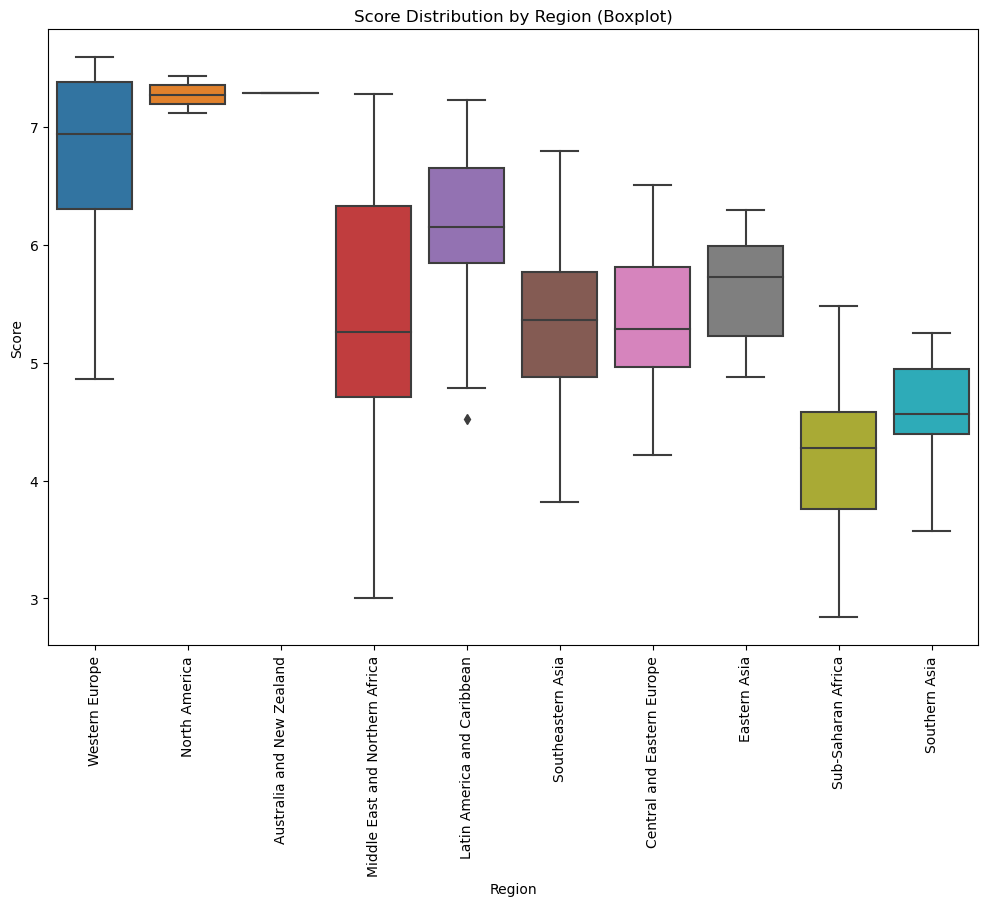

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Happiness Score', data=df)
plt.title('Score Distribution by Region (Boxplot)')
plt.xlabel('Region')
plt.ylabel('Score')
plt.xticks(rotation = 90 )
plt.show()


 * i observed differences in median scores and score distribution suggest a substantial influence of geographical and cultural factors on happiness levels within each region.

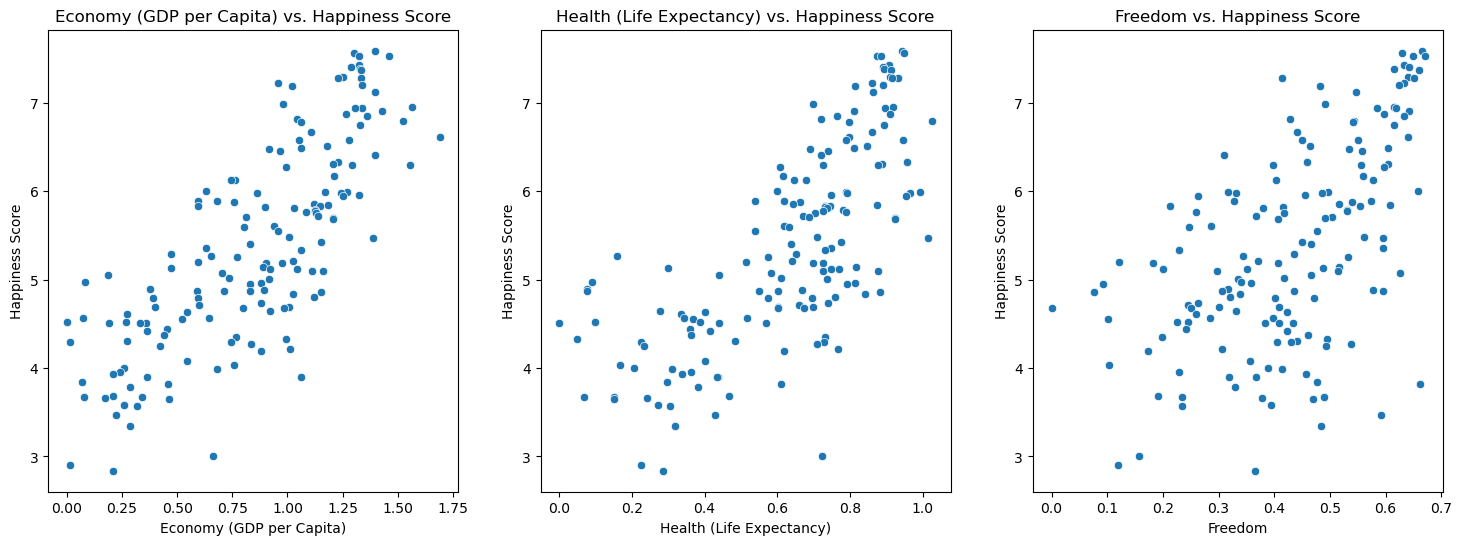

In [6]:
columns = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']
fig, axs = plt.subplots(1, len(columns), figsize=(18, 6))
for i, variable in enumerate(columns):
    sns.scatterplot(data = df, x=variable, y='Happiness Score', ax=axs[i])
    axs[i].set_title(f'{variable} vs. Happiness Score')


*  noticeable positive trend suggests that countries with higher GDP per capita generally have higher happiness scores
* countries with better health outcomes tend to be happier, indicating a strong connection between well-being and happiness.
* While there's a positive correlation, the scatter is more dispersed compared to GDP and health. This suggests that while freedom contributes to happiness, it might interact with other factors.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

* from this i conformed that there is no null values present 
* all the columns contains suitable datatypes respectively 

* there are only 10 region are found in the "region" column i encode those values

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
df = df.drop('Country', axis = 1)

* i will remove the 'Country" column because it doesn't use or impact for the analysis

In [10]:
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


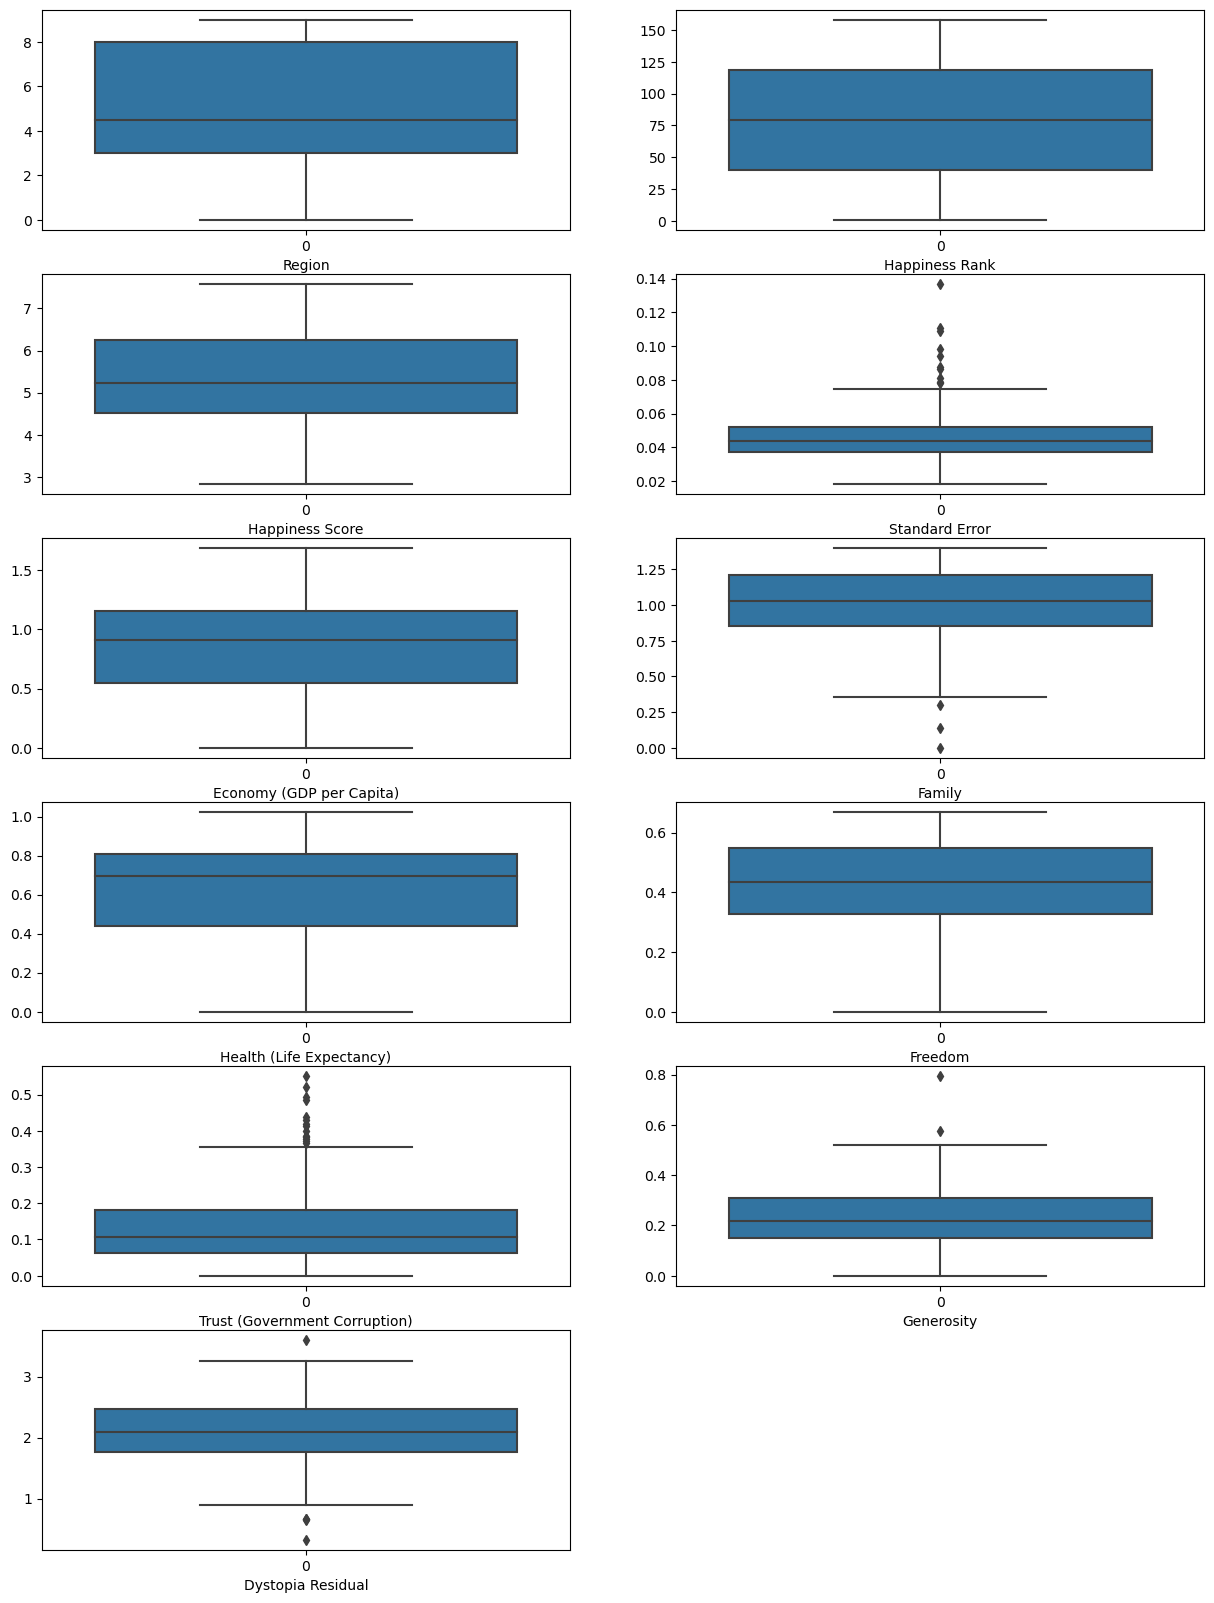

In [11]:
plt.figure(figsize=(15, 20))
a = 1 

for i in df.columns:
    if a <= 12:
        plt.subplot(6, 2, a)
        sns.boxplot(df[i])
        plt.xlabel(i)
        a += 1

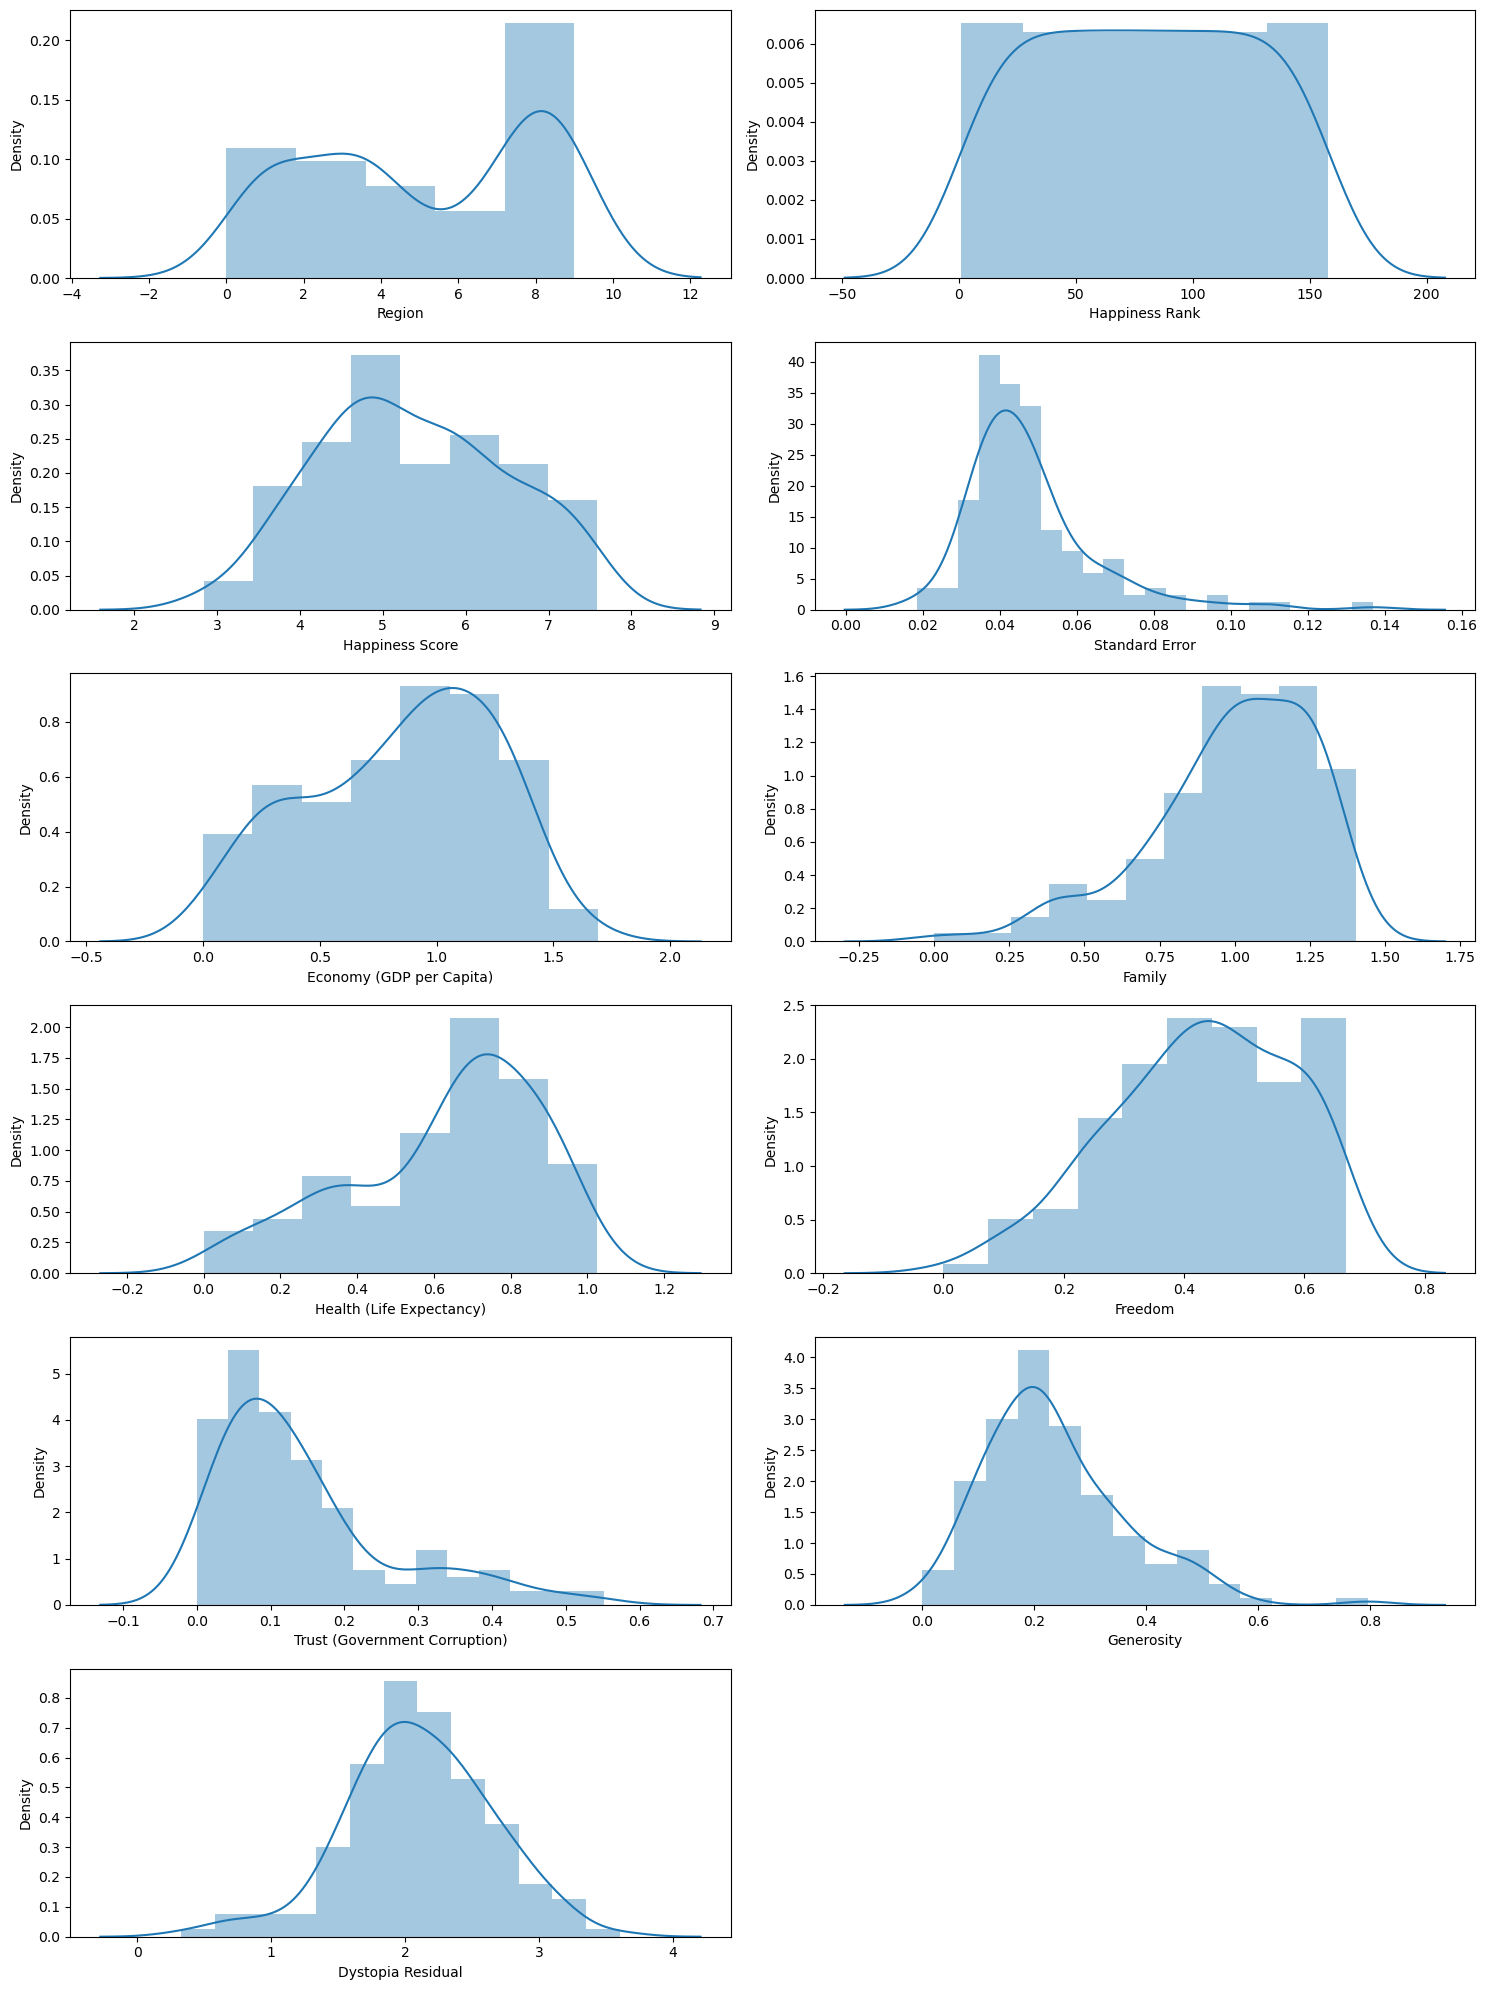

In [12]:
plt.figure(figsize=(15, 20))
a = 1 

for i in df.columns:
    if a <= 12:
        plt.subplot(6, 2, a)
        sns.distplot(df[i])
        plt.xlabel(i)
        a += 1

plt.tight_layout() 
plt.show()


* i found that some outliers present
* so i want to remove outliers for some columns
* from this we can reduce the skewness of the distribution

* removing the outlier  >>>>>>

In [13]:
cf  = ['Generosity', 'Trust (Government Corruption)', 'Standard Error']
for cn in cf:
    q1 = df[cn].quantile(0.25)
    q3 = df[cn].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    df = df[df[cn] <= ub]
df = df.reset_index(drop=True)
df.shape


(131, 11)

In [14]:
cf  = ['Family']
for cn in cf:
    q1 = df[cn].quantile(0.25)
    q3 = df[cn].quantile(0.75)
    iqr = q3 - q1
    lb = q3 - 1.5 * iqr
    df = df[df[cn] >= lb]
df = df.reset_index(drop=True)
df.shape


(114, 11)

In [15]:
df['Health (Life Expectancy)'] = np.sqrt(df['Health (Life Expectancy)'])

<Axes: >

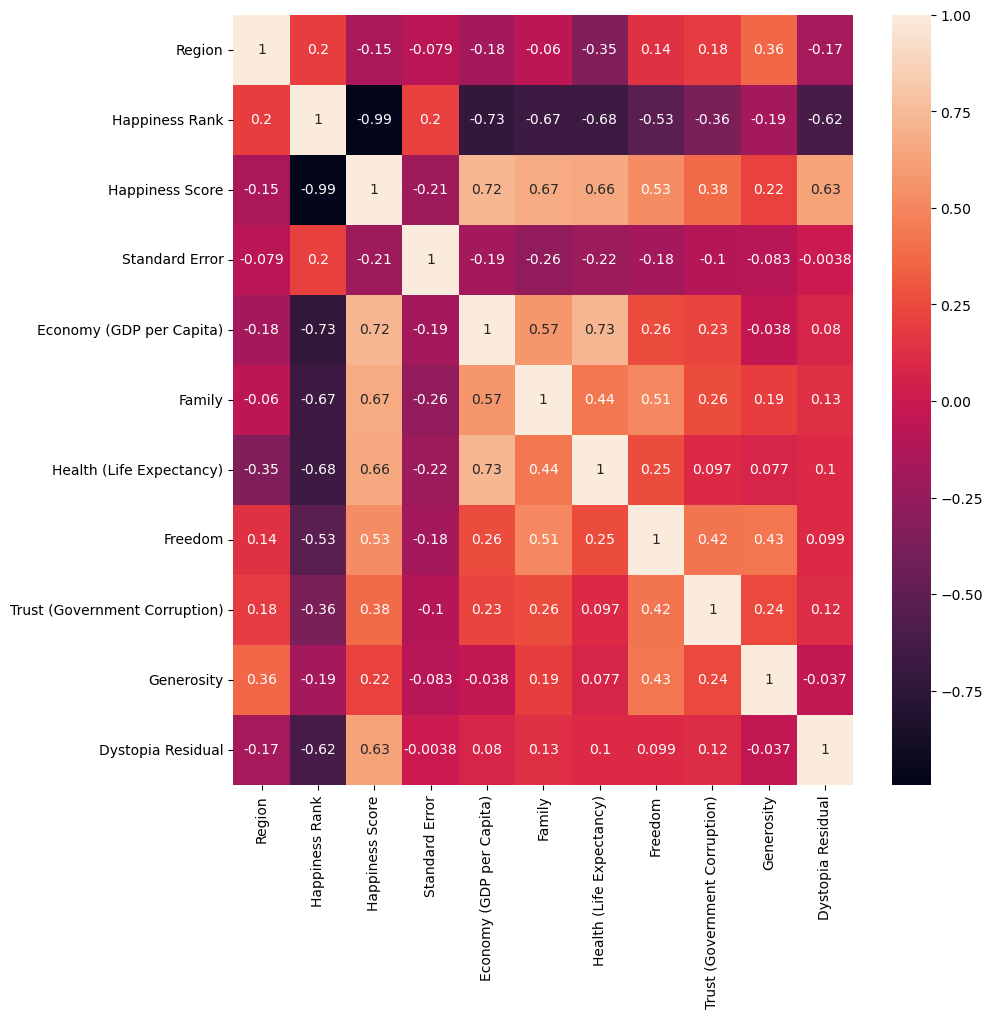

In [49]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

fron the above plot i observed that 'Region' Column shows the very low co- relation with the 

In [16]:
df.corr()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.196615,-0.153648,-0.079148,-0.177518,-0.060147,-0.346643,0.139276,0.184096,0.364969,-0.168833
Happiness Rank,0.196615,1.000000,-0.993196,0.202616,-0.725316,-0.673145,-0.677888,-0.525444,-0.363747,-0.189424,-0.618136
Happiness Score,-0.153648,-0.993196,1.000000,-0.207844,0.721272,0.672752,0.661127,0.528005,0.382027,0.219017,0.628914
Standard Error,-0.079148,0.202616,-0.207844,1.000000,-0.186263,-0.262975,-0.221469,-0.180413,-0.104482,-0.082514,-0.003763
Economy (GDP per Capita),-0.177518,-0.725316,0.721272,-0.186263,1.000000,0.566815,0.725520,0.259168,0.226383,-0.037826,0.080045
Family,-0.060147,-0.673145,0.672752,-0.262975,0.566815,1.000000,0.438726,0.506518,0.255689,0.191104,0.131228
Health (Life Expectancy),-0.346643,-0.677888,0.661127,-0.221469,0.725520,0.438726,1.000000,0.252978,0.097495,0.076760,0.101815
Freedom,0.139276,-0.525444,0.528005,-0.180413,0.259168,0.506518,0.252978,1.000000,0.421923,0.428623,0.098991
Trust (Government Corruption),0.184096,-0.363747,0.382027,-0.104482,0.226383,0.255689,0.097495,0.421923,1.000000,0.237773,0.117431
Generosity,0.364969,-0.189424,0.219017,-0.082514,-0.037826,0.191104,0.076760,0.428623,0.237773,1.000000,-0.037319


In [27]:
x= df.drop(['Happiness Score', ], axis = 1)
y= df['Happiness Score']

In [29]:
from sklearn.preprocessing import StandardScaler
xs = StandardScaler().fit_transform(x)

In [30]:
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.594709,Region
1,87.296019,Happiness Rank
2,1.128029,Standard Error
3,14.504279,Economy (GDP per Capita)
4,4.873552,Family
5,6.760838,Health (Life Expectancy)
6,4.294355,Freedom
7,1.675668,Trust (Government Corruption)
8,2.293355,Generosity
9,24.429974,Dystopia Residual


* i remove the the column 'Happiness Rank' because irt shows the high multi colinearity issue

In [31]:
xs = pd.DataFrame(xs, columns = x.columns)
xs = xs.drop('Happiness Rank', axis = 1)
xs

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.423069,0.312968,1.213037,1.929414,1.049447,1.454929,0.294922,1.892887,1.138957
1,0.101441,-0.918948,1.282769,1.482922,0.925212,1.483853,2.549747,2.081879,0.664066
2,1.423069,-1.616817,1.291933,1.244928,0.886999,1.365335,2.412746,2.237770,0.690519
3,-0.228966,-0.995769,0.998490,0.929546,0.949689,-0.029671,-0.467394,0.986661,1.872462
4,-0.559373,-0.085021,0.204913,1.007775,0.788433,1.489293,-0.132023,0.321592,2.040861
...,...,...,...,...,...,...,...,...,...
109,1.092662,-0.873595,-2.373668,-1.601134,-1.378783,0.409208,0.473995,-0.207863,-0.423279
110,1.092662,0.476791,-1.745881,-0.311176,-0.964332,-0.610963,-0.711670,1.091079,-1.368279
111,1.092662,-0.662568,-1.580847,-1.668596,-2.271890,-1.256714,-0.768964,-0.294603,-0.301467
112,1.092662,0.550836,-1.221833,-1.609546,-2.259130,0.352326,0.747637,-0.140446,-1.299128


In [32]:
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]
vif['Features'] = xs.columns
vif

,vif,Features
0,1.526002,Region
1,1.124783,Standard Error
2,2.884702,Economy (GDP per Capita)
3,1.933537,Family
4,2.719731,Health (Life Expectancy)
5,1.768630,Freedom
6,1.314641,Trust (Government Corruption)
7,1.530379,Generosity
8,1.066980,Dystopia Residual


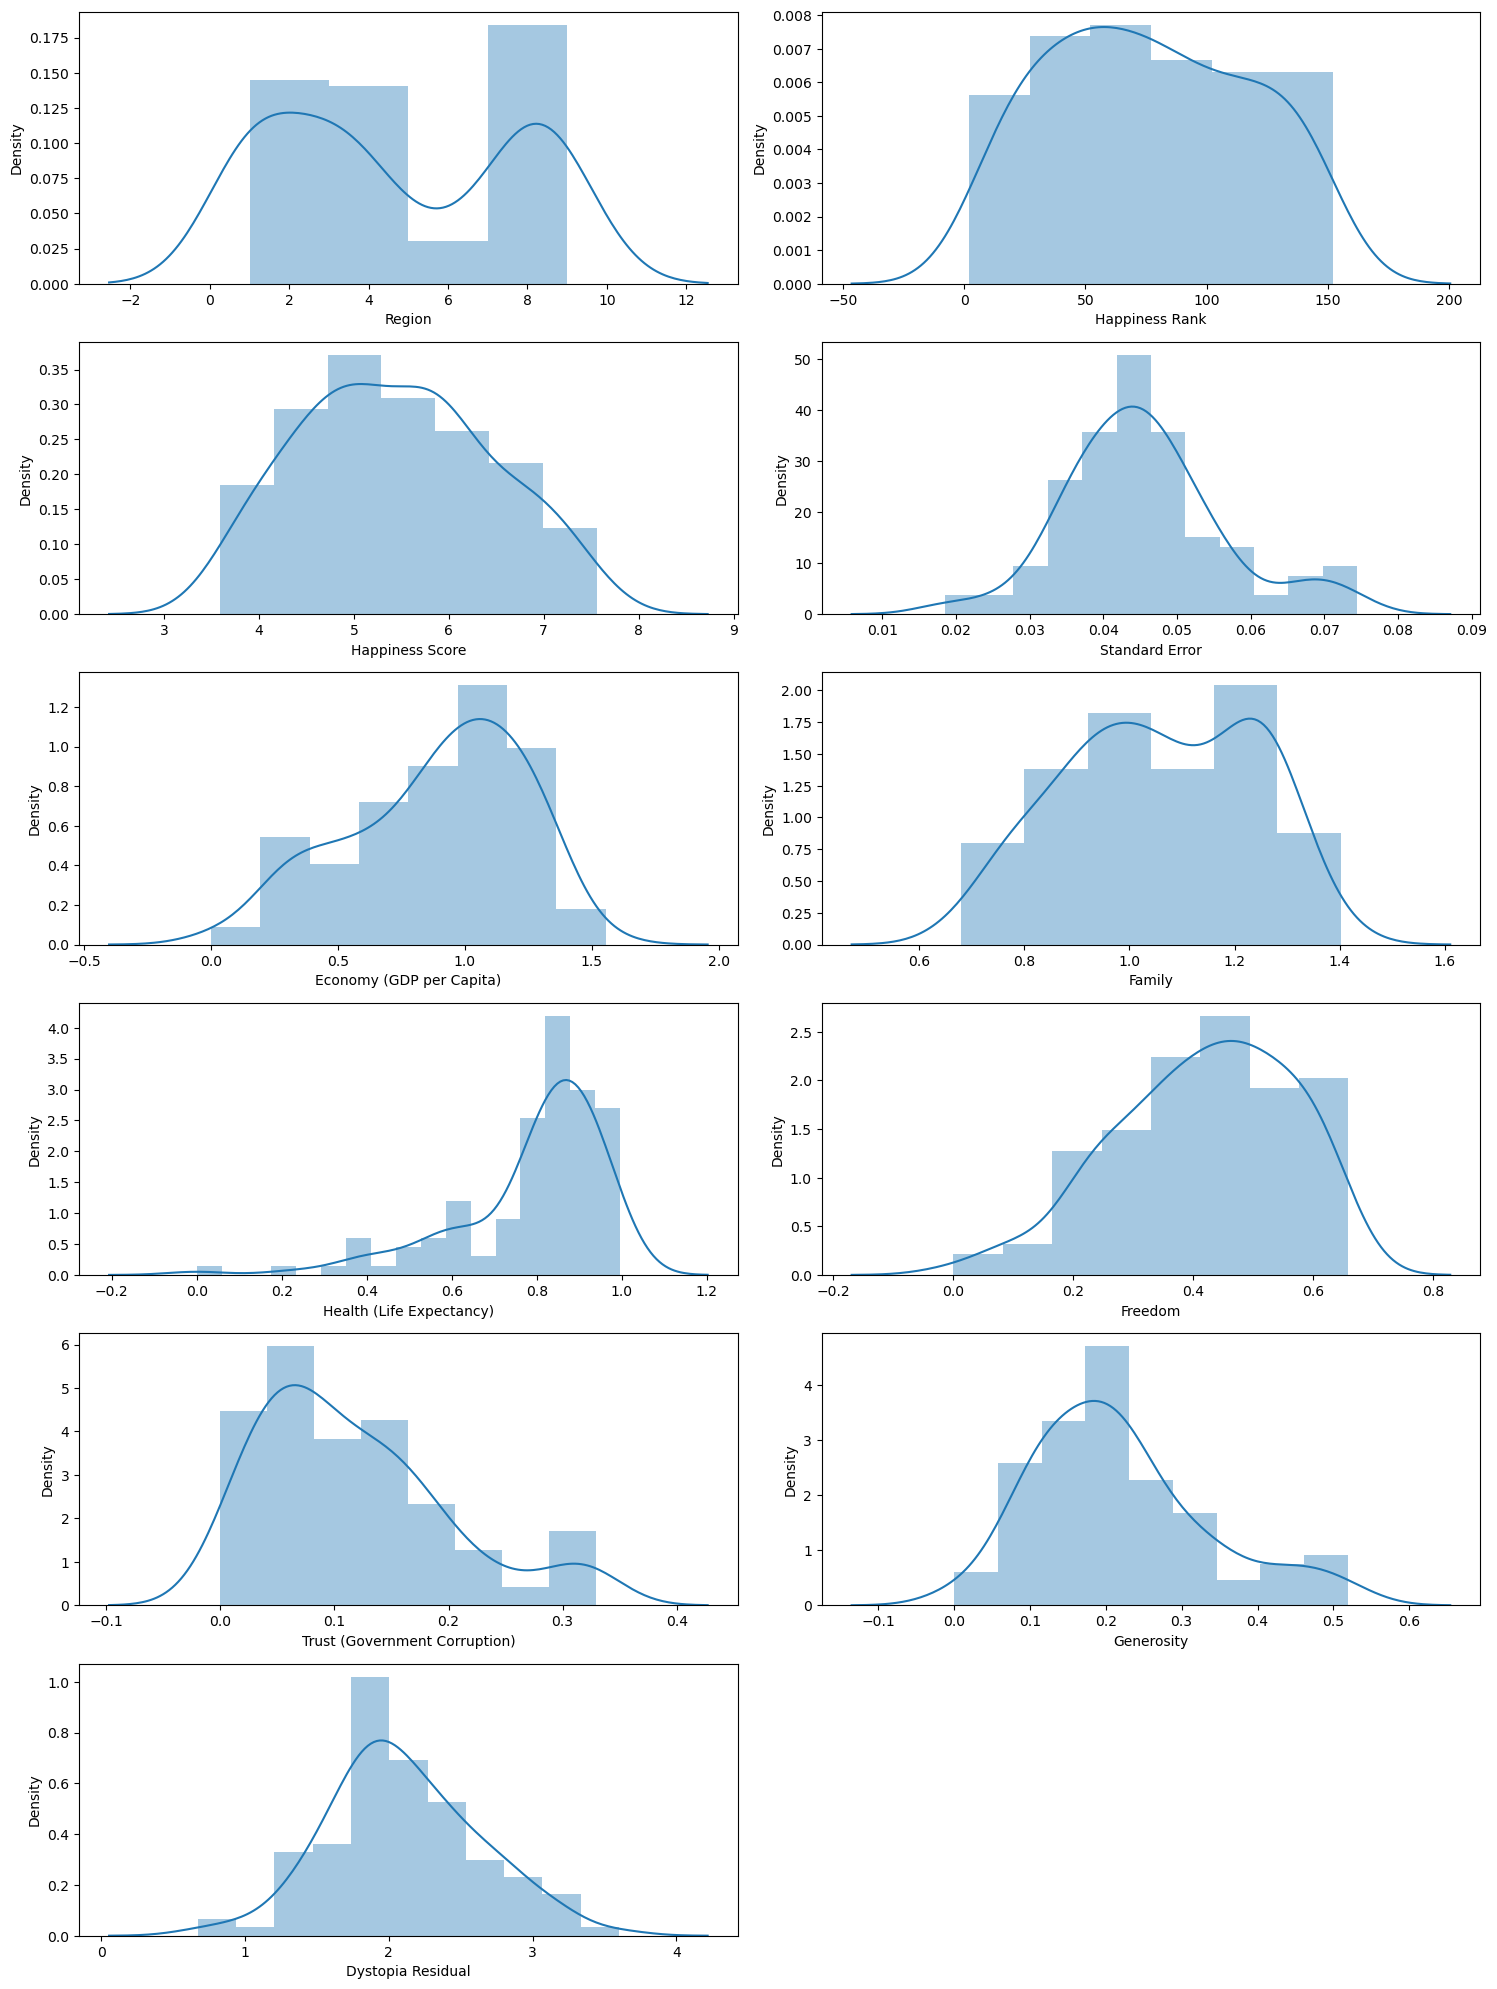

In [33]:
plt.figure(figsize=(15, 20))
a = 1 

for i in df.columns:
    if a <= 12:
        plt.subplot(6, 2, a)
        sns.distplot(df[i])
        plt.xlabel(i)
        a += 1

plt.tight_layout() 
plt.show()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)


In [35]:
regressor = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),
             GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

In [36]:
def metric_score(rg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_score = rg.predict(x_train)
        result_type = "train"
    else:
        y_score = rg.predict(x_test)
        result_type = "test"

    mse = mean_squared_error(y_train if train else y_test, y_score)
    r2 = r2_score(y_train if train else y_test, y_score) * 100
    
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} R2 score: {r2:.2f}%')
    print(f'{result_type}  MSE : {mse:.4f}')


In [37]:
for rg in regressor:
    print(f'\n================== {rg.__class__.__name__} ==================')
    rg.fit(x_train, y_train)
    metric_score(rg, x_train, x_test, y_train, y_test, train=True)
    metric_score(rg, x_train, x_test, y_train, y_test, train=False)


================== LinearRegression ==================

 ============ train result ==========
train R2 score: 99.79%
train  MSE : 0.0017

 ============ test result ==========
test R2 score: 99.93%
test  MSE : 0.0009

================== DecisionTreeRegressor ==================

 ============ train result ==========
train R2 score: 100.00%
train  MSE : 0.0000

 ============ test result ==========
test R2 score: 97.92%
test  MSE : 0.0277

================== RandomForestRegressor ==================

 ============ train result ==========
train R2 score: 99.89%
train  MSE : 0.0009

 ============ test result ==========
test R2 score: 98.54%
test  MSE : 0.0194

================== AdaBoostRegressor ==================

 ============ train result ==========
train R2 score: 99.70%
train  MSE : 0.0025

 ============ test result ==========
test R2 score: 98.73%
test  MSE : 0.0169

================== GradientBoostingRegressor ==================

 ============ train result ==========
train R2 score: 

In [38]:
for rg in regressor:
    cv = cross_val_score(rg, x, y, cv = 5)
    print('===========',rg, '==============')
    print('cv mean' ,cv.mean())
    a = rg.predict(x_test)
    print('diff between r2 score and cv score', (r2_score(y_test, a ) - cv.mean() ))

=========== LinearRegression() ==============
cv mean 0.9213539455754202
diff between r2 score and cv score 0.07797405776003252
=========== DecisionTreeRegressor() ==============
cv mean -1.588949664387029
diff between r2 score and cv score 2.5681017733926574
=========== RandomForestRegressor() ==============
cv mean -1.8907176121418998
diff between r2 score and cv score 2.8760937067602503
=========== AdaBoostRegressor() ==============
cv mean -2.464737315726679
diff between r2 score and cv score 3.452008863180809
=========== GradientBoostingRegressor() ==============
cv mean -1.2359186172470877
diff between r2 score and cv score 2.230815150521659
=========== SVR() ==============
cv mean -0.9365827898624441
diff between r2 score and cv score 1.923869913827801
=========== KNeighborsRegressor() ==============
cv mean -1.4601701483169445
diff between r2 score and cv score 2.450760788617343


* from the above scores observation i continue hyper para meter tuning with LinearRgression
* i observed that the model may be over fitted 
* so i use the genralized model that is 'RIDGE' regression

In [39]:
rm = Ridge()
alphas = np.logspace(-6, 6, 13)
param_grid = {'alpha': alphas}
gs = GridSearchCV(rm, param_grid, cv=5, scoring='r2')
gs.fit(x_train, y_train)
print("Good Parameters: ", gs.best_params_)
print(" R2 Score: ", gs.best_score_*100)

Good Parameters:  {'alpha': 0.01}
 R2 Score:  99.64633963449046


In [40]:
tscore = gs.score(x_test, y_test)
print("Test R2 Score: " , tscore*100 )

Test R2 Score:  99.90506801484032


In [41]:
final  = Ridge(alpha=0.01)
final.fit(x_train, y_train)
pred = final.predict(x_test)
ac = r2_score(y_test, pred)
ac * 100

99.90506801484032

* therefore after every step i think i developed the most generalized performanced model

In [42]:
import joblib
joblib.dump(final, "happiness.pkl")

['happiness.pkl']

In [43]:
load = joblib.load("happiness.pkl")
pd1 = load.predict(x_test)


In [44]:
ac = r2_score(y_test, pd1)
ac * 100

99.90506801484032